In [110]:
import pandas as pd
df = pd.read_csv('realdonaldtrump.csv')
df.head()

,id,link,content,date,retweets,favorites,mentions,hashtags
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,510,917,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,34,267,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,13,19,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,11,26,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,1375,1945,NaN,NaN


In [111]:
import re
import nltk
import numpy as np 
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
stopwords_en = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
import contractions


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\juane\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\juane\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\juane\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [112]:
stopwords_en.append('donald')
stopwords_en.append('trump')
def text_processing(texto):
    texto = contractions.fix(texto)
    texto = texto.lower()
    texto = re.sub(r'[^a-z0-9\s]', '', texto)
    texto = word_tokenize(texto)
    texto = [token for token in texto if token not in stopwords_en]
    texto = [lemmatizer.lemmatize(token) for token in texto]
    texto = ' '.join(texto)
    return texto

In [113]:
text_processing("you should've known!!! ??? leading leader leads 33")

'known leading leader lead 33'

In [114]:
from tqdm import tqdm
tqdm.pandas()

In [115]:
df['cleaned_text'] = df['content'].progress_apply(text_processing)

100%|██████████| 43352/43352 [00:05<00:00, 7794.24it/s]


In [116]:
df.head()

,id,link,content,date,retweets,favorites,mentions,hashtags,cleaned_text
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,510,917,NaN,NaN,sure tune watch late night david letterman pre...
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,34,267,NaN,NaN,appearing view tomorrow morning discus celebri...
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,13,19,NaN,NaN,read top ten financial tip late show david let...
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,11,26,NaN,NaN,new blog post celebrity apprentice finale less...
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,1375,1945,NaN,NaN,persona never wallflower would rather build wa...


In [117]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.util import ngrams

In [118]:
test = 'Un ninio floto sobre mi y volo un auto con su rasho laser'


In [119]:
ngrams(test, 2)

In [120]:
def generate_ngrams(n, arreglo):
    x = []
    for texto in arreglo:
        n_grams = ngrams(word_tokenize(texto), n)
        for ngram in n_grams:
            resultado = ' '.join(ngram)
            x.append(resultado)
    return pd.Series(x).value_counts()

In [121]:
trump_ngrams = generate_ngrams(2, df['cleaned_text'])
data = trump_ngrams.head(10)

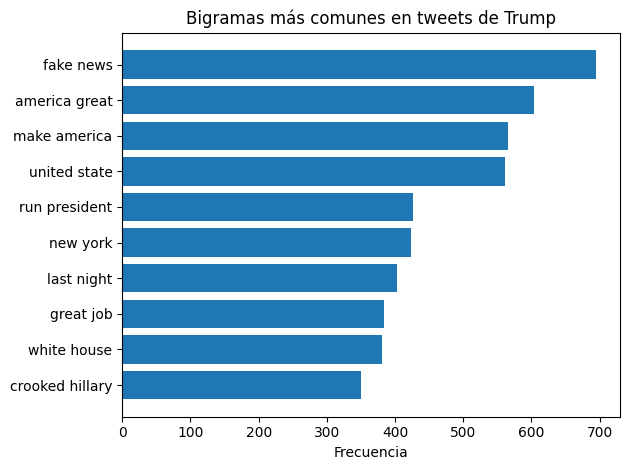

In [122]:
plt.barh(data.index, data.values)
plt.xlabel('Frecuencia')
plt.title('Bigramas más comunes en tweets de Trump')
plt.gca().invert_yaxis()
plt.tight_layout()

In [123]:
from PIL import Image
trump_mask = np.array(Image.open('dony.png'))

In [124]:
nube = WordCloud(width=1000,
                height=1000,
                colormap='Wistia_r',
                background_color='black',
                mask=trump_mask,
                contour_width=3,
                contour_color='white',
                collocations=False,
                random_state=42,
                max_words=100,
                max_font_size=150,
                min_font_size=1
                ).generate_from_frequencies(trump_ngrams)

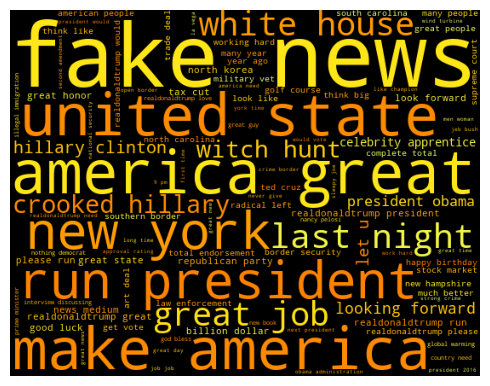

In [125]:
plt.figure(figsize=(5, 5))
plt.imshow(nube)
plt.axis('off')
plt.tight_layout()
plt.show()